# Import

In [1]:
import numpy as np
from pypianoroll import *
from matplotlib import pyplot as plt
import os
import sys
import time
import tensorflow as tf

In [ ]:
from musegan.bmusegan.components import Discriminator, Generator, Refiner
from musegan.bmusegan.components import End2EndGenerator
from musegan.utils.metrics import Metrics
from musegan.utils import midi_io
from musegan.utils import image_io

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# Array


In [2]:
file = os.path.join("./training_data", "lastfm_alternative_8b_phrase.npy")
file2 = os.path.join("./training_data", "500_lastfm_alternative_8b_phrase.npy")
#file3 = os.path.join("./training_data", "extra_short_lastfm_alternative_8b_phrase.npy")

In [3]:
x_test = np.load(file)

Format: [SongNr(2291), AusschnittNr (6) ,Bar(4), Timestep(96), pitch(84), Track(8)]


In [16]:
print(x_test[1][2][2][0][8])

[False False False  True False False False False]


In [13]:
print(x_test[1][2][2][0])

[[False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False  True False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [ True False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [ True False False False False False False False]
 [False False False False False

In [10]:
len(x_test[0][0][0][0][0])

8

In [4]:
x_test.shape


(2291, 6, 4, 96, 84, 8)

# Error testing

In [6]:
# prepare
x_train = x_test.reshape(-1, 4, 96, 84, 8)

In [29]:
x_train.shape

(13746, 4, 96, 84, 8)

In [15]:
x_sample = x_train[np.random.choice(len(x_train), 8, False)]


In [22]:
print(x_sample[0][0][0][0])

[False False False False False False False False]


In [28]:
x_sample.shape

(8, 4, 96, 84, 8)

# Shorten array to 500 songs á 6 ausschnitte

In [15]:
y_change = x_test
len(y_change)

2291

In [6]:
print(y_change[2290][5][0][0][0][0])

False


In [16]:
y_change = y_change[:500]
#50? 
len(y_change)

500

In [9]:
print(y_change[0, 0, 0, 0, 0, 0])

False


In [17]:
np.save(file2, y_change)

In [9]:
y_change = y_change[:6]

In [10]:
len(y_change)

6

In [11]:
np.save(file3, y_change)

In [13]:
# np.save(file, x_test)

# Stuff

In [18]:
x_train = x_test.reshape(-1, 4, 96, 84, 8)

In [62]:
# Format: [-1, Bar, Timestep, pitch, Track] -> -1 = SongNr * AusschnittNr = 13746 ausschnitte
print(x_train[13745][0][0][0][0])

False


In [72]:
print(x_train[13745][0][0][0][0])

False


In [74]:
print(x_train[0][0][0])

[[False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False  True False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False  True  True False False False]
 [False False False False False False False False]
 [False False False False False

# read evaluation

In [54]:
file = os.path.join("./exp","test_lastfm_alternative_pretrain_g_proposed_d_proposed","eval", "161426_test_bernoulli.npy")
file2 = os.path.join("./exp","test_lastfm_alternative_pretrain_g_proposed_d_proposed","eval", "19656_test_bernoulli.npy")
x_test = np.load(file)
y_test = x_test
z_test = np.load(file2)

In [46]:
y_test = x_test

In [52]:
print(y_test)

{'score_matrix_mean': array([[0.171875  , 0.40625   , 0.140625  , 0.28125   , 0.28125   ,
        0.921875  , 0.96875   , 0.78125   ],
       [2.75471698, 6.65789474, 7.67272727, 1.45652174, 4.58695652,
        1.2       , 2.        , 4.5       ],
       [       nan, 0.4558477 , 0.56836561, 0.63592183, 0.49226579,
        0.62666667, 0.675     , 0.53953971],
       [       nan, 0.31003289, 0.46647727, 0.00860507, 0.21331522,
        0.        , 0.03645833, 0.17485119],
       [       nan, 0.71829969, 0.70738303, 0.41685625, 0.53768448,
        0.99565217, 0.93333333, 0.85643193],
       [0.52744319,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan, 3.28947368, 3.49090909, 1.36956522, 2.56521739,
        1.2       , 2.        , 1.85714286]]), 'score_pair_matrix_mean': array([1.00593873])}


In [55]:
print(z_test)

{'score_matrix_mean': array([[0.1875    , 0.15625   , 0.0625    , 0.609375  , 0.40625   ,
        0.984375  , 0.9375    , 0.96875   ],
       [2.03846154, 3.87037037, 6.5       , 1.52      , 2.84210526,
        1.        , 1.25      , 3.        ],
       [       nan, 0.53821246, 0.45009254, 0.70856488, 0.73493452,
        0.        , 0.41123188, 0.80357143],
       [       nan, 0.14911265, 0.37552083, 0.00875   , 0.18832237,
        0.        , 0.03645833, 0.25520833],
       [       nan, 0.71780695, 0.67008251, 0.0907008 , 0.98056625,
        1.        , 0.75      , 0.92857143],
       [0.53108604,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan, 1.94444444, 3.        , 1.16      , 1.76315789,
        1.        , 1.25      , 2.        ]]), 'score_pair_matrix_mean': array([1.32665174])}


In [44]:
print(type(y_test))
print(y_test.shape)
print(y_test.dtype)

<class 'numpy.ndarray'>
()
object


In [ ]:
y_test

In [42]:
print(y_test.tolist())

{'score_matrix_mean': array([[0.015625  , 0.46875   , 0.        , 0.234375  , 0.578125  ,
        0.921875  , 0.953125  , 0.90625   ],
       [2.58730159, 5.97058824, 8.203125  , 1.87755102, 4.37037037,
        1.6       , 3.66666667, 6.        ],
       [       nan, 0.40387106, 0.50625641, 0.52970753, 0.55710289,
        0.45      , 0.83611111, 0.64093101],
       [       nan, 0.32383578, 0.49479167, 0.00871599, 0.22530864,
        0.08541667, 0.14930556, 0.26215278],
       [       nan, 0.8116862 , 0.68468074, 0.40789751, 0.62088615,
        0.8       , 1.        , 0.64762044],
       [0.52295816,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan, 2.97058824, 3.859375  , 1.57142857, 2.22222222,
        1.        , 2.        , 2.5       ]]), 'score_pair_matrix_mean': array([1.17713249])}


In [28]:
x = np.zeros((2,2), dtype=[('a', np.int32), ('b', np.float64, (3,3))])

In [43]:
y_test

array({'score_matrix_mean': array([[0.015625  , 0.46875   , 0.        , 0.234375  , 0.578125  ,
        0.921875  , 0.953125  , 0.90625   ],
       [2.58730159, 5.97058824, 8.203125  , 1.87755102, 4.37037037,
        1.6       , 3.66666667, 6.        ],
       [       nan, 0.40387106, 0.50625641, 0.52970753, 0.55710289,
        0.45      , 0.83611111, 0.64093101],
       [       nan, 0.32383578, 0.49479167, 0.00871599, 0.22530864,
        0.08541667, 0.14930556, 0.26215278],
       [       nan, 0.8116862 , 0.68468074, 0.40789751, 0.62088615,
        0.8       , 1.        , 0.64762044],
       [0.52295816,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan, 2.97058824, 3.859375  , 1.57142857, 2.22222222,
        1.        , 2.        , 2.5       ]]), 'score_pair_matrix_mean': array([1.17713249])},
      dtype=object)

In [66]:
np.set_printoptions(threshold=100000000)

# Test mit samples

In [3]:
z_sample = np.random.normal(size=(16, 128))


In [9]:
print(z_sample)

[[ 0.34707398 -0.75547232 -0.11441392 ... -0.75865124  0.61753337
   0.15460388]
 [ 0.47725285 -0.83431061  0.82941203 ... -3.2708147  -0.06704979
   0.6216324 ]
 [-0.48650083 -0.2013105  -0.31223006 ... -0.14953707 -0.12414651
   1.4119016 ]
 ...
 [-0.73684889 -0.13207229 -2.02120495 ...  0.28018361 -0.3590633
  -0.16180185]
 [ 1.54148882  1.31816387  0.65257275 ...  1.62015886  0.91155157
   2.21063434]
 [-1.31237894  0.40233648  1.49241757 ...  0.07158024  0.20972144
  -3.10701702]]


In [ ]:
self.x_sample = x_train[np.random.choice(len(x_train), self.config['batch_size'], False)]

# Test print Netz


In [ ]:
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

In [1]:

model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Using TensorFlow backend.


In [2]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [3]:
print(model)

In [8]:
np.set_printoptions(threshold=1000)

In [6]:
np.set_printoptions(threshold=10000000000)

In [4]:
    def get_summary(self):
        """Return model summary."""
        return '\n'.join(
            ["{:-^80}".format(' < ' + self.scope.name + ' > ')]
            + [(x.get_summary() + '\n' + '-' * 80) for x in self.components])

In [ ]:
file = os.path.join("./training_data", "lastfm_alternative_8b_phrase.npy")
file2 = os.path.join("./training_data", "500_lastfm_alternative_8b_phrase.npy")
x_change = np.load(file)
x_change = x_change[:500]
np.save(file2, x_change)

# Use 17 Instrument .npz Files

In [2]:
file = os.path.join(".", "training_data", "b97c529ab9ef783a849b896816001748.npz")
multitrack = Multitrack(file)
x =np.load(file)
print(x, "\n\n\n")
print(multitrack, "\n\n\n")
print(len(multitrack.tracks[0].pianoroll))
print(len(multitrack.tracks[0].pianoroll[0]))




tracks : [Drums, Piano, Chromatic Percussion, Organ, Guitar, Bass, Strings, Ensemble, Brass, Reed, Pipe, Synth Lead, Synth Pad, Synth Effects, Ethnic, Percussive, Sound Effects],
tempo : [122.00180563 122.00180563 122.00180563 ... 122.00180563 122.00180563
 122.00180563],
downbeat : [ True False False ... False False False],
beat_resolution : 24,
name : b97c529ab9ef783a849b896816001748 



11136
128


In [14]:
for i in range(17):
    print(multitrack.tracks[i].name)
    print(multitrack.tracks[i].is_drum)
    print(multitrack.tracks[i].program, "\n")

Drums
True
0 

Piano
False
0 

Chromatic Percussion
False
8 

Organ
False
16 

Guitar
False
24 

Bass
False
32 

Strings
False
40 

Ensemble
False
48 

Brass
False
56 

Reed
False
64 

Pipe
False
72 

Synth Lead
False
80 

Synth Pad
False
88 

Synth Effects
False
96 

Ethnic
False
104 

Percussive
False
112 

Sound Effects
False
120 



D:\Users\Lrozm\Anaconda3\envs\Music_fun\lib\site-packages\pypianoroll\visualization.py:157: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  interpolation="none",


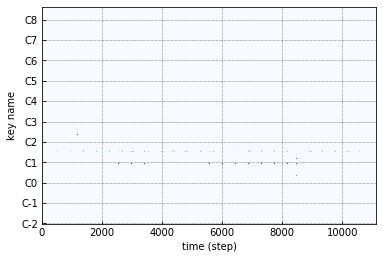

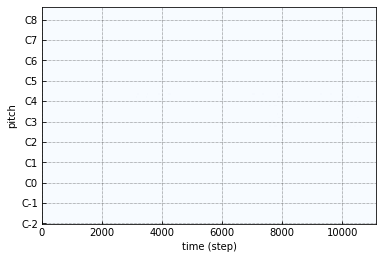

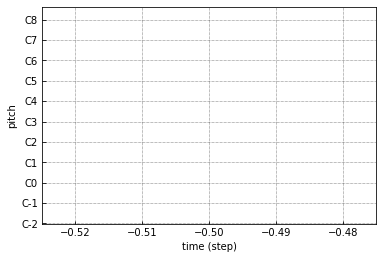

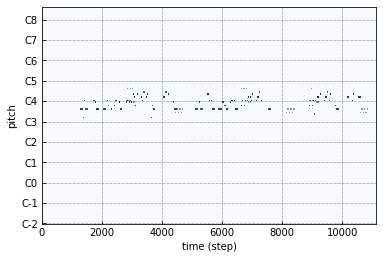

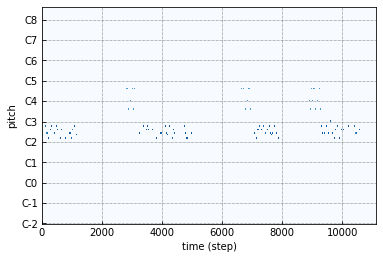

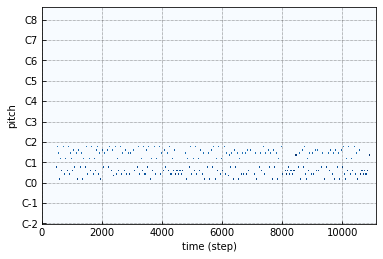

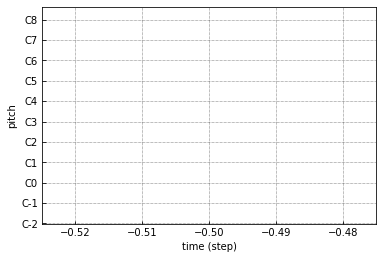

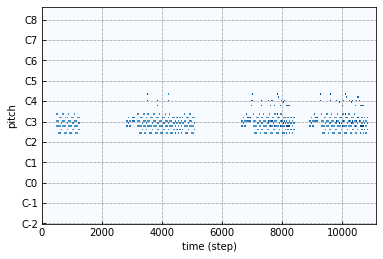

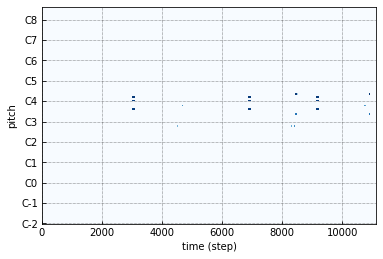

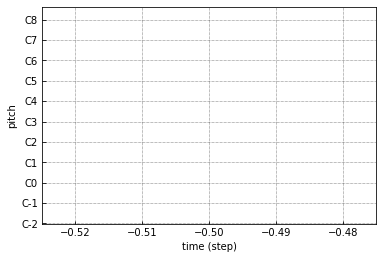

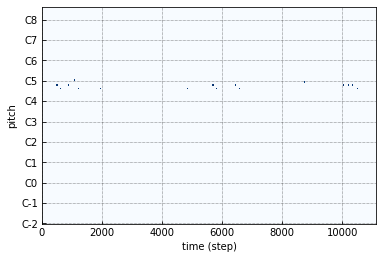

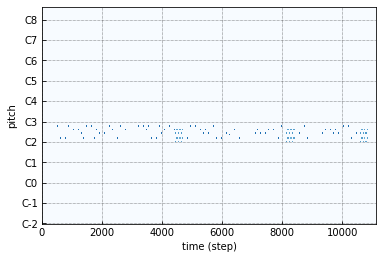

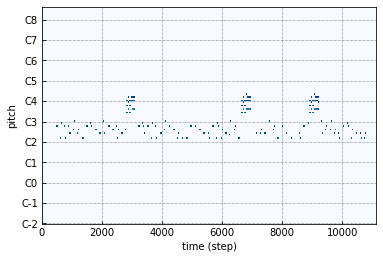

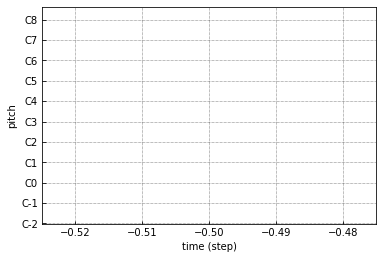

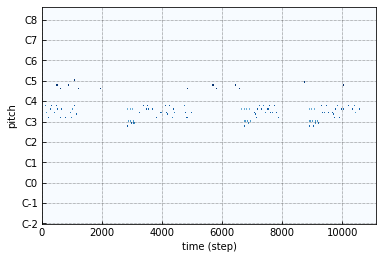

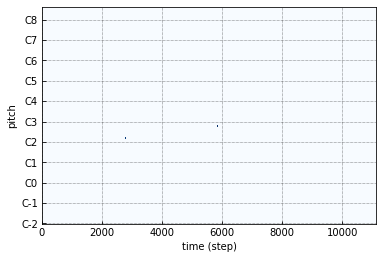

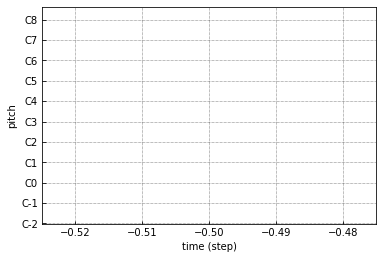

In [13]:
for i in multitrack.tracks:
    i.plot()

In [14]:
multitrack.write('./training_data/test.mid')

In [3]:
multitrack.binarize()
print(multitrack.tracks[15], "\n\n\n")
print(multitrack.tracks[0].pianoroll[50])

pianoroll :
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]],
program : 112,
is_drum : False,
name : Percussive 



[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False

In [11]:
print(len(multitrack.tracks[2].pianoroll))

0


In [4]:
#y = [multitrack] # y= []
y = []
y.append(multitrack)
y.append(multitrack)
print(y[0].tracks[2])

pianoroll :
[],
program : 8,
is_drum : False,
name : Chromatic Percussion


In [5]:
for z in range(len(y)):
    for i in range(17):
        #print(y[0].tracks[i].pianoroll, "\n\n")
        print(z)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [23]:
for i in range(4):
    print(i)

0
1
2
3


In [9]:
y[0] = None
print(y[0], "\n\n")
print(y[1])

None 


tracks : [Drums, Piano, Chromatic Percussion, Organ, Guitar, Bass, Strings, Ensemble, Brass, Reed, Pipe, Synth Lead, Synth Pad, Synth Effects, Ethnic, Percussive, Sound Effects],
tempo : [122.00180563 122.00180563 122.00180563 ... 122.00180563 122.00180563
 122.00180563],
downbeat : [ True False False ... False False False],
beat_resolution : 24,
name : b97c529ab9ef783a849b896816001748


In [ ]:
for root, dirs, files in os.walk(os.path.join(".", "training_data", "lpd_17_cleansed")):
    for name in files:
        print(os.path.join(root, name))


In [62]:
TrainDataArry = [x][4][96][84][17]

In [119]:

c = []
for y in range(4):
    a = []
    for z in range(4):
        b = []
        for i in range(17):
            b.append((i + 17*z +17*4*y ))
        a.append(b)
    c.append(a)

In [143]:
c = []
c.append(False)
c.append(False)
c.append(False)
print(c)

[False, False, False]


In [156]:
 b = []
for i in range(17):
    b.append(i)
    if len(b) >= 10:
            break
b.append(42)

In [157]:
print(b)
len(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 42]


11

In [124]:
c

[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
  [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
  [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
  [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]],
 [[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84],
  [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101],
  [102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118],
  [119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135]],
 [[136,
   137,
   138,
   139,
   140,
   141,
   142,
   143,
   144,
   145,
   146,
   147,
   148,
   149,
   150,
   151,
   152],
  [153,
   154,
   155,
   156,
   157,
   158,
   159,
   160,
   161,
   162,
   163,
   164,
   165,
   166,
   167,
   168,
   169],
  [170,
   171,
   172,
  

# control generated 17 Instruments training data

In [10]:
file = os.path.join("./training_data", "lastfm_alternative_8b_phrase.npy")
file2 = os.path.join("./training_data", "lpd_17_Final_200_cleansed.npy")
x = np.load(file)
y = np.load(file2)

In [11]:
x.shape

(2291, 6, 4, 96, 84, 8)

In [12]:
y.shape

(200, 6, 4, 96, 84, 17)

In [ ]:
#for i in range(50):
print(y[0][2][2][0][2])

In [8]:
x[1][2][2][0][12]

array([False, False, False, False, False, False, False, False])